# Ford GoBike Bike Sharing System 2019
## by: Maged Mohamed

## Investigation Overview

> In this investigation, I wanted to look at what affects 'how many' and 'how long' the trips take along the year and among different users type.

## Dataset Overview

> * I collected the dataset for the year 2019 for `Bay Wheels` (previously known as `Ford GoBike`).  
> * The dataset is 2.4 million rows by 16 columns represent the bike sharing system records for the whole year of 2019.  
> * For each row, a trip records for duration, start time, end time, bike id, trip start and end location. Besides information about the user.  
> * About 4% of the data points were removed from the analysis due to inconsistencies or missing information.  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load the combined dataframe
bike = pd.read_csv('Ford_GoBike_2019_assembled.csv')

In [3]:
# dropping irrelevant columns 
bike.drop(columns = ['rental_access_method', 'bike_share_for_all_trip', 'start_station_latitude', 'start_station_longitude',
                     'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)

In [4]:
bike.dropna(inplace = True) # dropping nulls

In [5]:
# data types
# Converting `start_time` and `end_time` to datetime
bike['start_time'] = pd.to_datetime(bike.start_time)
bike['end_time'] = pd.to_datetime(bike.end_time)
# Converting `start_station_id`, `end_station_id` and `bike_id` to integer to remove the decimal points
# and eventually to `string` as they are just labels
bike['start_station_id'] = bike['start_station_id'].astype('int').astype('str')
bike['end_station_id'] = bike['end_station_id'].astype('int').astype('str')
bike['bike_id'] = bike['bike_id'].astype(int).astype('str')

In [6]:
# Creating features that represent the data aspects from `start_time`
bike['hour'] = bike.start_time.dt.hour.astype(int)
bike['month'] = bike.start_time.dt.month.astype(int)
bike['weekday'] = bike.start_time.dt.dayofweek.astype(int)
# Creating a feature for Day parts
b = [0,6,12,18,24]
l = ['night', 'morning','after_noon','evening']
bike['day_part'] = pd.cut(bike['hour'], bins=b, labels=l, include_lowest=True)

In [7]:
# for faster preformance I somtimes will use a sample of the dataset (as the orginal is over 2 million records)
bike_sample = bike.sample(frac= .25, random_state= 1) #sampling 25% of the database to speed up the graph

## Distribution of Trip Duration
>Trip duration has long tailed right skewed distribution, by plotting on a logarithmic scale, normal distribution appears.

Trip Duration Average 804.8 seconds
Trip Duration Median 569.0 seconds



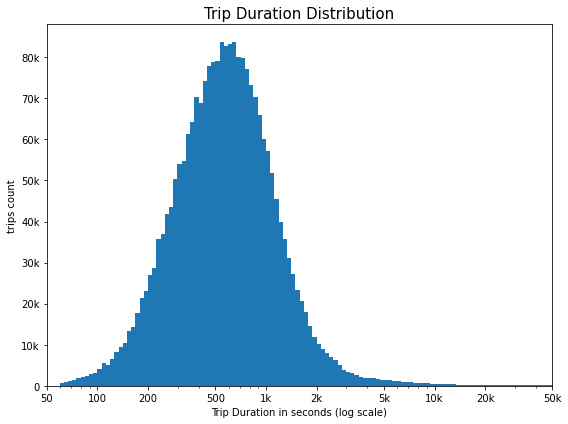

In [8]:
# ploting again on a `log` scale
plt.figure(figsize= [8,6])
log_binsize = 0.025
bins = 10 ** np.arange(1.5, np.log10(bike['duration_sec'].max())+log_binsize, log_binsize)
plt.hist(data= bike, x = 'duration_sec', bins = bins)
duration_ticks = [ 50, 100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3, 20e3, 50e3]
duration_ticks_label = [ '50', '100', '200', '500', '1k', '2k', '5k', '10k', '20k', '50k']
plt.xscale('log')
plt.xticks(duration_ticks, duration_ticks_label)
plt.xlabel('Trip Duration in seconds (log scale)')
plt.title('Trip Duration Distribution', fontsize = 15)
plt.xlim(50,50e3)
plt.ylabel('trips count')
plt.yticks(np.arange(0,90e3,10e3), ['0', '10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k'])
plt.tight_layout()
print('Trip Duration Average {:.1f} seconds'.format(bike.duration_sec.mean()))
print('Trip Duration Median {:.1f} seconds'.format(bike.duration_sec.median()))
;
print()

## Distribution By Different Time Aspects

> * Examining the hours of the trip, we can see a bimodal distribution with two peaks at 8 o'clock and 17 o'clock. 
> * Examining the weekday, we can see that trips count is reduced during the weekends.
> * Months count of trips rises up in 3,4 (March, April [Spring season]) and then rises again at 7,8,9,10 (July to October [Summer season]) to decrease again at 11 and 12 (Winter season).   
> * Afternoons are the busiest time for renting bikes, mornings to follow.

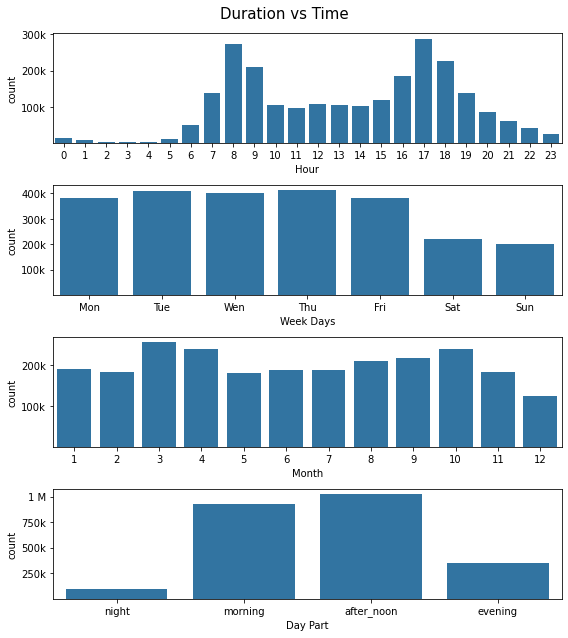

In [9]:
# Exploring the four time asepects that we previously created from the `start_time`
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(nrows= 4, figsize = [8,9])
plt.suptitle('Duration vs Time', fontsize = 15)
sb.countplot(data= bike, x= 'hour', color= base_color, ax = ax[0])
sb.countplot(data= bike, x= 'weekday', color= base_color, ax = ax[1])
sb.countplot(data= bike, x= 'month', color= base_color, ax = ax[2])
sb.countplot(data= bike, x= 'day_part', color= base_color, ax = ax[3])
ax[0].set_xlabel('Hour')
ax[0].set_yticks([100e3, 200e3, 300e3])
ax[0].set_yticklabels(['100k', '200k', '300k'])
ax[1].set_xticks(np.arange(0,7))
ax[1].set_xticklabels(['Mon', 'Tue', 'Wen', 'Thu', 'Fri', 'Sat', 'Sun'])
ax[1].set_xlabel('Week Days')
ax[1].set_yticks([100e3, 200e3, 300e3, 400e3])
ax[1].set_yticklabels(['100k', '200k', '300k', '400k'])
ax[2].set_xlabel('Month')
ax[2].set_yticks([100e3, 200e3])
ax[2].set_yticklabels(['100k', '200k'])
ax[3].set_xlabel('Day Part')
ax[3].set_yticks([250e3, 500e3, 750e3, 1e6])
ax[3].set_yticklabels(['250k', '500k', '750k', '1 M'])
plt.tight_layout()
;
print()

## Trip Duration Distribution by Hours.
> * Despite the fact that night time has low traffic than day time, I found an interesting peak in the trip duration trend at 3 o'clock after midnight.  
> * We can see that although the trip counts are low around this hour, they are less deviated around high trip duration.  
> * By drawing a scatter plot between the hour and duration of the trips, it depicts a fish like shape.
> * The pinch point at the fish-tail is at 3 o'clock. Now we can understand that although 3 o'clock has low traffic, most of the trips are concentrated at relatively high duration. (the lower limit of trip counts are raised at 3 o'clock).
> * Average trips around 3 AM after midnight are less in count but more in duration.



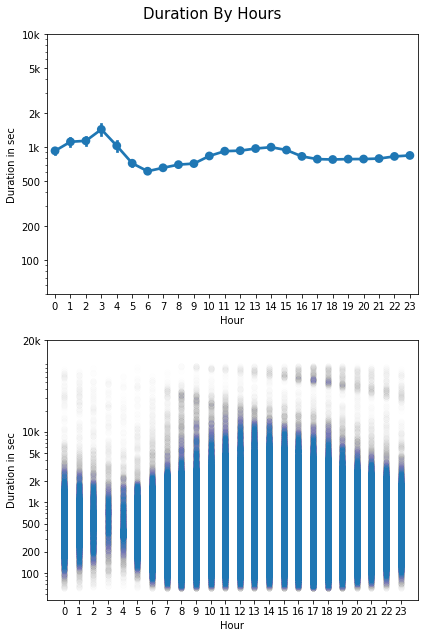

In [17]:
# plotting a pointplot to trend the trip durations with hour
fig, ax = plt.subplots(nrows= 2, figsize = [6,9])
sb.pointplot(data= bike, x = 'hour', y= 'duration_sec', color= base_color, ax = ax[0])
duration_ticks = [100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3, 20e4]
duration_ticks_label = ['100', '200', '500', '1k', '2k', '5k', '10k', '20k']
ax[0].set_yscale('log') # duration will be best represented by log
ax[0].set_yticks(duration_ticks)
ax[0].set_yticklabels(duration_ticks_label)
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Duration in sec')
ax[0].set_ylim(50,10e3) 
# plotting the values as a scatter plot with high transparency 
ax[1].scatter(data= bike, x = 'hour', y= 'duration_sec', alpha = .002)
ax[1].set_yscale('log') # duration will be best represented by log
ax[1].set_yticks(duration_ticks)
ax[1].set_yticklabels(duration_ticks_label)
ax[1].set_xticks(np.arange(24))
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Duration in sec')
plt.suptitle('Duration By Hours', fontsize = 15)
plt.tight_layout()
;
print()

## Trip Duration Distribution by Week days
> * Although we found that there are less bikes rented at weekends, They seems to take a longer time in average.  
> * Note in the sub-slide plot how at weekends the distribution is slimmer with higher average. (Remember the trip duration scale is logarithmic)  
> * In weekends trips are fewer but longer

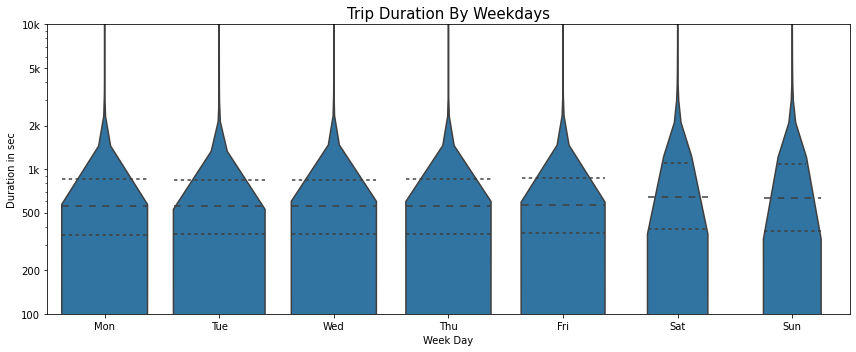

In [16]:
plt.figure(figsize= [12,5])
sb.violinplot(data= bike_sample, x = 'weekday', y= 'duration_sec', inner = 'quartile' , color= base_color)
duration_ticks = [100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3, 20e4]
duration_ticks_label = ['100', '200', '500', '1k', '2k', '5k', '10k', '20k']
plt.yscale('log') # duration will be best represented by log
plt.yticks(duration_ticks, duration_ticks_label)
plt.ylabel('Duration in sec')
plt.xticks(np.arange(0,7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Week Day')
plt.ylim(100,10e3)
plt.title('Trip Duration By Weekdays', fontsize = 15)
plt.tight_layout()
;
print()

# User Types
> * There are two types of users in the system namely 'subscribers' and 'customers'.  
> * 80% of the users are subscribers but interstingly I found that the trips taken by customers last longer.

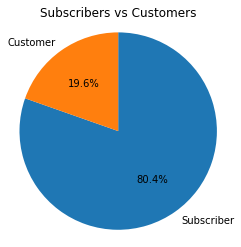

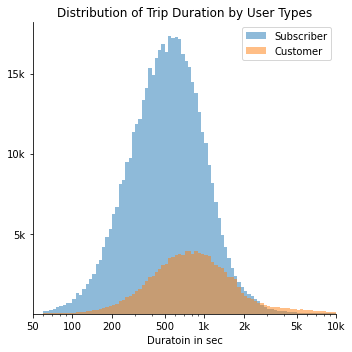

In [12]:
# plotting the user types in pie chart
plt.figure(figsize=[4,4])
sorted_label = bike.user_type.value_counts()
plt.pie(sorted_label, labels = sorted_label.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('square')
plt.title('Subscribers vs Customers')
# ploting overlapped histogram for 'subscribers' and 'customers' 
g = sb.FacetGrid(data= bike_sample, hue = 'user_type', hue_order=['Subscriber', 'Customer'] , height= 5)
g.map(plt.hist, 'duration_sec', bins = bins, alpha = .5)
plt.xscale('log')
duration_ticks = [ 50, 100 ,200 ,500 ,1e3 ,2e3 ,5e3 ,10e3]
duration_ticks_label = [ '50', '100', '200', '500', '1k', '2k', '5k', '10k']
plt.xticks(duration_ticks, duration_ticks_label)
plt.xlim(50,10000)
plt.xlabel('Duratoin in sec')
plt.legend()
plt.title('Distribution of Trip Duration by User Types')
plt.yticks([5e3, 10e3, 15e3], ['5k', '10k', '15k'])
plt.tight_layout()
;
print()

In [13]:
# assisting function to plot variables agaist duration_sec and  user_type
def duration_user_by(var):
    sb.pointplot(data= bike_sample, x = var, y = 'duration_sec', hue = 'user_type', hue_order=['Subscriber', 'Customer'])
    plt.yscale('log')
    duration_ticks = [300,1000,3000,1e4]
    duration_labels = [ '300', '1k', '3k', '10k']
    plt.ylabel('Duration (sec)')
    plt.yticks(duration_ticks, duration_labels)
    plt.xticks(np.arange(0,bike[var].max())+1)
    plt.xlabel('{}'.format(var.capitalize()))
    plt.legend()

## Subscribers Or Customers?
> * Plotting the trip duration versus time for different user types, It is evident that customers make longer trips along the year.  
> * Customers rented only 1/5 the trips per year but they tend to rider for longer time. 

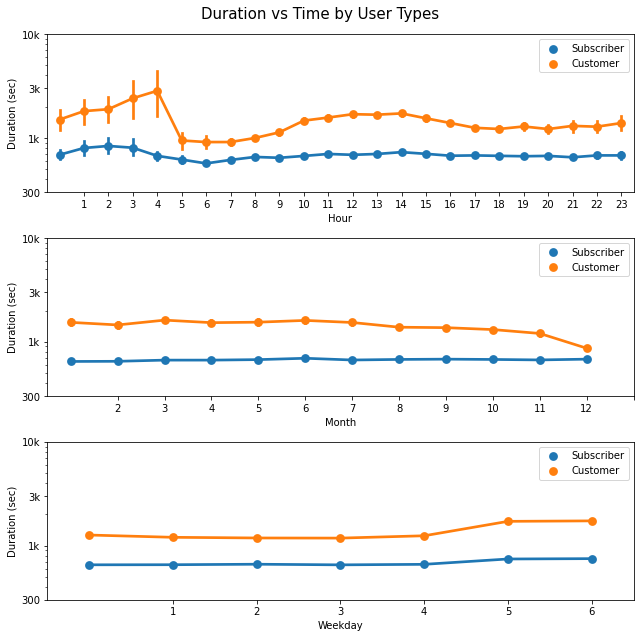

In [18]:
plt.figure(figsize= [9,9])
plt.subplot(3,1,1)
duration_user_by('hour')
plt.subplot(3,1,2)
duration_user_by('month')
plt.subplot(3,1,3)
duration_user_by('weekday')
plt.suptitle('Duration vs Time by User Types', fontsize = 15)
plt.tight_layout()
;
print()